In [1]:
import os.path as osp
import time
import matplotlib.pyplot as plt
import math

import torch
import torch.nn.functional as F

import torch_geometric.transforms as T
from torch_geometric.datasets import Planetoid, WebKB, HeterophilousGraphDataset, TUDataset
from torch_geometric.nn import GATConv
from torch_geometric.utils import to_networkx, from_networkx, to_dense_adj

import networkx as nx

from GraphRicciCurvature.OllivierRicci import OllivierRicci

from FormanRicci import FormanRicci
from attention_curvature import Experiment, GAT

mutag = list(TUDataset('data', name='MUTAG'))
proteins = list(TUDataset(root="data", name="PROTEINS"))

/n/home07/lfesser/.conda/envs/borf/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [33]:
proteins_1_layer = Experiment(proteins, 1)

In [37]:
proteins_1_layer.train(1)

Model trained for 2 total epochs.


In [14]:
def sumtorial(n):
    result = 0
    for i in range(n+1):
        result += i
    return result

mutag_cliques = [graph for graph in mutag if graph.num_edges/2 == sumtorial(graph.num_nodes-1)]
# enzymes_cliques = [graph for graph in enzymes if graph.num_edges/2 == sumtorial(graph.num_nodes-1)]
proteins_cliques = [graph for graph in proteins if graph.num_edges/2 == sumtorial(graph.num_nodes-1)]

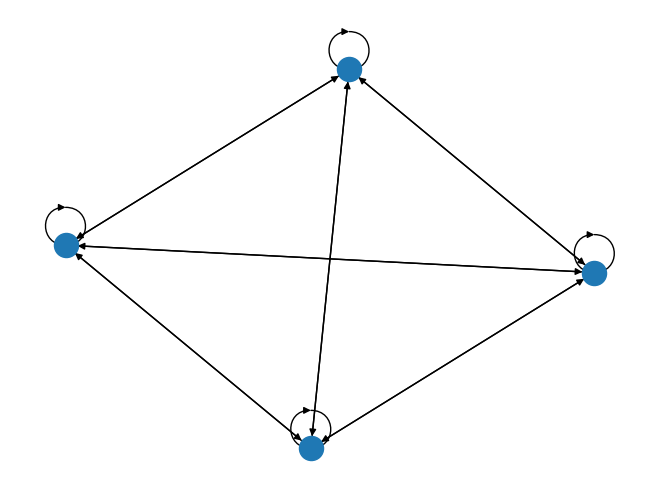

In [38]:
attention_graph, attention = proteins_1_layer.create_attention_digraph(proteins_cliques[0], 0)

nx.draw(attention_graph)

Text(0.5, 1.0, 'Histogram of Directed Ricci Curvatures')

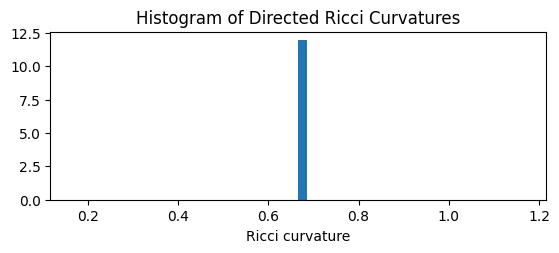

In [39]:
plt.subplot(2, 1, 1)
ricci_curvtures = compute_edge_curvatures(attention_graph).values()
# ricci_curvtures = [value for value in ricci_curvtures if value > -100]
plt.hist(ricci_curvtures,bins=50)
plt.xlabel('Ricci curvature')
plt.title("Histogram of Directed Ricci Curvatures")

In [5]:
def compute_edge_curvatures(graph):
    """
    Compute the Ollivier-Ricci curvature of a given directed and weighted graph.
    """
    curvatures = {}
    orc = OllivierRicci(graph, alpha=0, verbose="ERROR")
    orc.compute_ricci_curvature()
    for edge in graph.edges:
        if edge[0] != edge[1]:
            curvatures[edge] = orc.G.edges[edge]["ricciCurvature"]
    return curvatures

In [63]:
total_attention = 0
j = 2

for i in range(len(attention_graph.nodes())):
    if (i, j) in attention_graph.edges():
        total_attention += attention_graph.edges[(i, j)]['weight']
        print(attention_graph.edges[(i, j)])

print("Total attention: ", total_attention)

{'weight': 0.25}
{'weight': 0.25}
{'weight': 0.25}
{'weight': 0.25}
Total attention:  1.0
